# Draw two chains from 2D unit normal multivariate Gaussian chains called barley and wheat

In [1]:
import numpy as np
import matplotlib.pyplot as plt


num_samples = 20000
mean = np.zeros(2)
cov = np.eye(2)


wheat_chain = np.random.multivariate_normal(mean, cov, num_samples)
barley_chain = np.random.multivariate_normal(mean, cov, num_samples)

# 'Harvest' the two chains

In [2]:
from CombineHarvester import Harvest


In [3]:
#initiate the the class
Wheat = Harvest('output/Wheat', chain = wheat_chain, n_flows = 7) 
Barley = Harvest('output/Barley', chain = barley_chain, n_flows = 7)


In [4]:
#train the flows
Wheat.harvest()
Barley.harvest()

Training the flows


 13%|█████▎                                   | 13/100 [00:11<01:19,  1.10it/s, train=2.8477669, val=2.8682618 (Max patience reached)]


Training the flows


  7%|██▉                                       | 7/100 [00:07<01:45,  1.14s/it, train=2.8469152, val=2.9013903 (Max patience reached)]


# 'Combine' the two chains

In [5]:
from CombineHarvester import Combine
Grain = Combine(Wheat, Barley)

In [6]:
wheat_weights, barley_weights = Grain.combine()

# Let's compare the two set of weighted chains to the truth which is normal with cov = diag(1/2 , 1/2)

In [7]:
truth_chains = np.random.multivariate_normal(mean, 0.5 * cov, num_samples) 

Removed no burn in
Removed no burn in
Removed no burn in


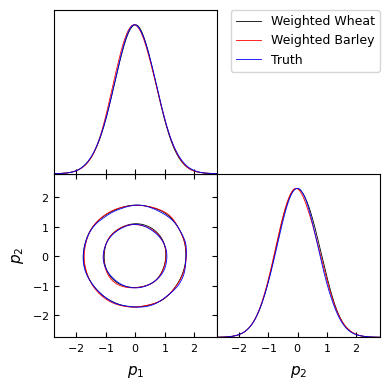

In [8]:
import getdist.plots as gdplt
from getdist import MCSamples

weighted_wheat =  MCSamples(samples=wheat_chain, weights=wheat_weights)
weighted_barley =  MCSamples(samples=barley_chain, weights=barley_weights)
truth = MCSamples(samples=truth_chains)

g = gdplt.get_subplot_plotter()
g.triangle_plot([weighted_wheat, weighted_barley, truth], filled=False, legend_labels=['Weighted Wheat', 'Weighted Barley', 'Truth'])
plt.show()

# You can also save and reload the trained flows

In [9]:
Wheat.save_models()
Barley.save_models()

0.0

In [10]:
Wheat_2 = Harvest('output/Wheat', chain = wheat_chain, n_flows = 1) 
Barley_2 = Harvest('output/Barley', chain = barley_chain, n_flows = 2)

In [11]:
Wheat_2.load_models()
Barley_2.load_models()

0.0

In [12]:
Grain_2 = Combine(Wheat_2, Barley_2)

In [13]:
wheat_weights_2, barley_weights_2 = Grain_2.combine()

Removed no burn in
Removed no burn in
Removed no burn in


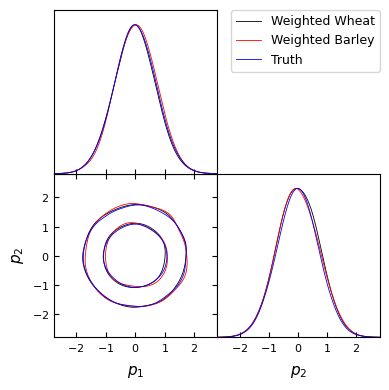

In [14]:
import getdist.plots as gdplt
from getdist import MCSamples

weighted_wheat_2 =  MCSamples(samples=wheat_chain, weights=wheat_weights_2)
weighted_barley_2 =  MCSamples(samples=barley_chain, weights=barley_weights_2)
truth = MCSamples(samples=truth_chains)

g = gdplt.get_subplot_plotter()
g.triangle_plot([weighted_wheat_2, weighted_barley_2, truth], filled=False, legend_labels=['Weighted Wheat', 'Weighted Barley', 'Truth'])
plt.show()

# Look at what happens using subset of flows. Can be used to track convergence

In [18]:
# see what happen when we use 1 flow instead of 7 for each 
wheat_weights_2_flows, barley_weights_2_flows = Grain.combine_subset(n_flows_1 = 1, n_flows_2 = 1) 

Removed no burn in
Removed no burn in
Removed no burn in


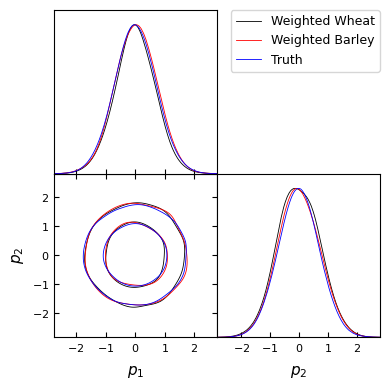

In [19]:
import getdist.plots as gdplt
from getdist import MCSamples

weighted_wheat =  MCSamples(samples=wheat_chain, weights=wheat_weights_2_flows)
weighted_barley =  MCSamples(samples=barley_chain, weights=barley_weights_2_flows)
truth = MCSamples(samples=truth_chains)

g = gdplt.get_subplot_plotter()
g.triangle_plot([weighted_wheat, weighted_barley, truth], filled=False, legend_labels=['Weighted Wheat', 'Weighted Barley', 'Truth'])
plt.show()